In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path="C:/Users/lesli/Jupyter-Workspace/05-APIs Class 2 (18 June)/.env")

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca_api_key

'PKMXSCQQB4668UR5CHKA'

In [5]:
alpaca_secret_key

'nF06gawqWsC8YpSUQS4UDHyWmX0J5rYhHzKA0Zm3'

In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [7]:
# Format  date as ISO format
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

In [8]:
# Set the tickers
tickers = ['ENB', 'TJX', 'GD', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'PM']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

In [9]:
# Reorganizing the DataFrame df_portfolio
#tickers = ['ENB', 'SHLD', 'GD', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'PM']


# Separate ticker data
ENB = df_portfolio[df_portfolio['symbol']=='ENB'].drop('symbol', axis=1)
TJX = df_portfolio[df_portfolio['symbol']=='TJX'].drop('symbol', axis=1)
GD = df_portfolio[df_portfolio['symbol']=='GD'].drop('symbol', axis=1)
TVE = df_portfolio[df_portfolio['symbol']=='TVE'].drop('symbol', axis=1)
CNR = df_portfolio[df_portfolio['symbol']=='CNR'].drop('symbol', axis=1)
CP = df_portfolio[df_portfolio['symbol']=='CP'].drop('symbol', axis=1)
BNS = df_portfolio[df_portfolio['symbol']=='BNS'].drop('symbol', axis=1)
TRI = df_portfolio[df_portfolio['symbol']=='TRI'].drop('symbol', axis=1)
BCE = df_portfolio[df_portfolio['symbol']=='BCE'].drop('symbol', axis=1)
PM = df_portfolio[df_portfolio['symbol']=='PM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([ENB,TJX,GD,TVE,CNR,CP,BNS,TRI,BCE,PM],axis=1, keys=['ENB', 'TJX', 'GD', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'PM'])

In [10]:
# Display sample data of concatenated Dataframe
print(df_portfolio.isnull().sum())

ENB  open           0
     high           0
     low            0
     close          0
     volume         0
                   ..
PM   low            0
     close          0
     volume         0
     trade_count    0
     vwap           0
Length: 70, dtype: int64


In [11]:
df_portfolio

ENB                                    \
                            open     high      low  close   volume   
timestamp                                                            
2017-01-03 05:00:00+00:00  42.46  42.8700  42.3100  42.54  2124989   
2017-01-04 05:00:00+00:00  42.67  43.2300  42.5600  42.84  2373616   
2017-01-05 05:00:00+00:00  42.96  43.4100  42.8700  43.34  2339635   
2017-01-06 05:00:00+00:00  43.35  43.6300  43.1600  43.61  1598786   
2017-01-09 05:00:00+00:00  43.37  43.8200  43.1350  43.45  2084809   
...                          ...      ...      ...    ...      ...   
2021-12-27 05:00:00+00:00  38.10  38.4594  37.8600  38.44  2577516   
2021-12-28 05:00:00+00:00  38.48  38.5750  38.2400  38.30  2269194   
2021-12-29 05:00:00+00:00  38.30  38.4600  38.1150  38.39  3078509   
2021-12-30 05:00:00+00:00  38.44  38.7600  38.4300  38.65  3304644   
2021-12-31 05:00:00+00:00  38.77  39.1300  38.6841  39.08  3779309   

                                                    TJX                  ...  \
                          trade_count       vwap   open     high    low  ...   
timestamp                                                                ...   
2017-01-03 05:00:00+00:00       16970  42.578771  75.61  75.9300  74.94  ...   
2017-01-04 05:00:00+00:00       16964  42.923171  75.81  76.7300  75.79  ...   
2017-01-05 05:00:00+00:00       18002  43.172401  75.31  76.5200  74.99  ...   
2017-01-06 05:00:00+00:00       12753  43.411556  76.04  76.5468  75.81  ...   
2017-01-09 05:00:00+00:00       16158  43.568889  75.90  76.5800  75.86  ...   
...                               ...        ...    ...      ...    ...  ...   
2021-12-27 05:00:00+00:00       18514  38.248073  73.74  74.5300  73.73  ...   
2021-12-28 05:00:00+00:00       14973  38.359371  74.17  75.2950  74.17  ...   
2021-12-29 05:00:00+00:00       20815  38.300311  74.74  75.9200  74.70  ...   
2021-12-30 05:00:00+00:00       21991  38.652453  75.35  76.1300  75.35  ...   
2021-12-31 05:00:00+00:00       23097  38.895789  75.65  76.3250  75.38  ...   

                               BCE                            PM          \
                            volume trade_count       vwap   open    high   
timestamp                                                                  
2017-01-03 05:00:00+00:00  1015777        7843  43.469485  91.92  92.000   
2017-01-04 05:00:00+00:00   781131        6318  43.975035  90.58  91.120   
2017-01-05 05:00:00+00:00  1073243        8061  44.538528  90.69  91.755   
2017-01-06 05:00:00+00:00   928130        7340  44.377277  91.39  91.960   
2017-01-09 05:00:00+00:00  1133600        8854  43.824584  91.03  91.440   
...                            ...         ...        ...    ...     ...   
2021-12-27 05:00:00+00:00   434452        4169  51.623586  92.87  93.560   
2021-12-28 05:00:00+00:00   552236        5489  51.648797  93.39  94.150   
2021-12-29 05:00:00+00:00   655847        7295  51.467164  93.95  94.690   
2021-12-30 05:00:00+00:00   697727        6936  51.634800  94.46  94.720   
2021-12-31 05:00:00+00:00   712777        7263  52.020574  94.21  95.185   

                                                                         
                             low  close   volume trade_count       vwap  
timestamp                                                                
2017-01-03 05:00:00+00:00  90.92  91.23  5040999       35790  91.161885  
2017-01-04 05:00:00+00:00  90.12  90.42  6695535       39990  90.565138  
2017-01-05 05:00:00+00:00  90.53  91.13  4840475       34964  91.190391  
2017-01-06 05:00:00+00:00  90.73  91.84  3826077       27732  91.664100  
2017-01-09 05:00:00+00:00  90.83  91.31  3529324       23997  91.217987  
...                          ...    ...      ...         ...        ...  
2021-12-27 05:00:00+00:00  92.61  93.54  2032973       21112  93.227546  
2021-12-28 05:00:00+00:00  93.29  93.86  2621465       23800  93.791342  
2021-12-29 05:00:00+00:00  93.75  94.30  3236809

In [12]:
df_portfolio = df_portfolio.dropna()

In [13]:
df_portfolio

ENB                                    \
                            open     high      low  close   volume   
timestamp                                                            
2017-01-03 05:00:00+00:00  42.46  42.8700  42.3100  42.54  2124989   
2017-01-04 05:00:00+00:00  42.67  43.2300  42.5600  42.84  2373616   
2017-01-05 05:00:00+00:00  42.96  43.4100  42.8700  43.34  2339635   
2017-01-06 05:00:00+00:00  43.35  43.6300  43.1600  43.61  1598786   
2017-01-09 05:00:00+00:00  43.37  43.8200  43.1350  43.45  2084809   
...                          ...      ...      ...    ...      ...   
2021-12-27 05:00:00+00:00  38.10  38.4594  37.8600  38.44  2577516   
2021-12-28 05:00:00+00:00  38.48  38.5750  38.2400  38.30  2269194   
2021-12-29 05:00:00+00:00  38.30  38.4600  38.1150  38.39  3078509   
2021-12-30 05:00:00+00:00  38.44  38.7600  38.4300  38.65  3304644   
2021-12-31 05:00:00+00:00  38.77  39.1300  38.6841  39.08  3779309   

                                                    TJX                  ...  \
                          trade_count       vwap   open     high    low  ...   
timestamp                                                                ...   
2017-01-03 05:00:00+00:00       16970  42.578771  75.61  75.9300  74.94  ...   
2017-01-04 05:00:00+00:00       16964  42.923171  75.81  76.7300  75.79  ...   
2017-01-05 05:00:00+00:00       18002  43.172401  75.31  76.5200  74.99  ...   
2017-01-06 05:00:00+00:00       12753  43.411556  76.04  76.5468  75.81  ...   
2017-01-09 05:00:00+00:00       16158  43.568889  75.90  76.5800  75.86  ...   
...                               ...        ...    ...      ...    ...  ...   
2021-12-27 05:00:00+00:00       18514  38.248073  73.74  74.5300  73.73  ...   
2021-12-28 05:00:00+00:00       14973  38.359371  74.17  75.2950  74.17  ...   
2021-12-29 05:00:00+00:00       20815  38.300311  74.74  75.9200  74.70  ...   
2021-12-30 05:00:00+00:00       21991  38.652453  75.35  76.1300  75.35  ...   
2021-12-31 05:00:00+00:00       23097  38.895789  75.65  76.3250  75.38  ...   

                               BCE                            PM          \
                            volume trade_count       vwap   open    high   
timestamp                                                                  
2017-01-03 05:00:00+00:00  1015777        7843  43.469485  91.92  92.000   
2017-01-04 05:00:00+00:00   781131        6318  43.975035  90.58  91.120   
2017-01-05 05:00:00+00:00  1073243        8061  44.538528  90.69  91.755   
2017-01-06 05:00:00+00:00   928130        7340  44.377277  91.39  91.960   
2017-01-09 05:00:00+00:00  1133600        8854  43.824584  91.03  91.440   
...                            ...         ...        ...    ...     ...   
2021-12-27 05:00:00+00:00   434452        4169  51.623586  92.87  93.560   
2021-12-28 05:00:00+00:00   552236        5489  51.648797  93.39  94.150   
2021-12-29 05:00:00+00:00   655847        7295  51.467164  93.95  94.690   
2021-12-30 05:00:00+00:00   697727        6936  51.634800  94.46  94.720   
2021-12-31 05:00:00+00:00   712777        7263  52.020574  94.21  95.185   

                                                                         
                             low  close   volume trade_count       vwap  
timestamp                                                                
2017-01-03 05:00:00+00:00  90.92  91.23  5040999       35790  91.161885  
2017-01-04 05:00:00+00:00  90.12  90.42  6695535       39990  90.565138  
2017-01-05 05:00:00+00:00  90.53  91.13  4840475       34964  91.190391  
2017-01-06 05:00:00+00:00  90.73  91.84  3826077       27732  91.664100  
2017-01-09 05:00:00+00:00  90.83  91.31  3529324       23997  91.217987  
...                          ...    ...      ...         ...        ...  
2021-12-27 05:00:00+00:00  92.61  93.54  2032973       21112  93.227546  
2021-12-28 05:00:00+00:00  93.29  93.86  2621465       23800  93.791342  
2021-12-29 05:00:00+00:00  93.75  94.30  3236809

In [14]:
#Import MCSimulation
from MCForecastTools import MCSimulation

In [15]:
# Set number of simulations to 500 and equal weights to all stocks 
num_sims = 500
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [16]:
# Run Monte Carlo simulations to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015062,0.981382,1.010097,1.000194,1.003118,0.991688,1.002115,1.026774,0.999649,1.032473,...,0.998167,1.018542,1.014632,0.999709,1.036801,1.002758,0.998580,1.003182,0.983995,1.026912
2,1.024016,0.989734,1.002206,0.985734,1.007074,0.998233,0.996272,1.008891,0.988683,1.024525,...,0.994074,1.025329,1.001864,1.005929,1.039999,1.009613,1.014012,1.021542,0.969904,1.033575
3,1.021764,0.979280,0.998119,1.002051,1.021062,0.995161,1.027943,1.018734,0.999280,1.031978,...,0.979973,1.027670,1.007035,1.027933,1.041087,0.992799,1.026406,1.021765,0.959728,1.030000
4,1.051585,0.966622,1.002287,1.004039,1.007871,0.991822,1.050060,1.044120,0.982420,1.029536,...,0.989017,1.005409,1.024835,1.008940,1.042701,1.029999,1.028782,1.040437,0.921007,1.053376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,765.206149,105.924624,909.733166,212.544004,50.324982,78.659313,2572.205644,165.844249,1594.105074,96.428745,...,87.264741,91.054722,456.009250,242.008968,77.551537,300.090597,102.873123,329.675601,7.632250,178.250058
7557,790.718748,107.504132,916.653749,211.648581,50.031277,78.512345,2532.987609,167.314441,1559.764269,98.241555,...,87.656453,90.748231,460.276716,232.008002,77.131674,299.852705,101.740493,330.335302,7.565673,181.209319
7558,777.625554,110.493097,915.648402,217.512693,50.458420,78.501469,2508.842457,166.578661,1611.471449,100.103196,...,87.776611,90.279311,471.412609,230.097939,75.392738,301.624801,104.774074,330.562998,7.576543,176.628901
7559,785.112459,106.899149,903.761369,219.971807,50.450447,79.015791,2539.942183,168.132703,1616.619782,100.450501,...,88.205462,89.605311,472.189424,229.814862,75.873586,300.832074,105.421971,330.278114,7.767634,173.893498


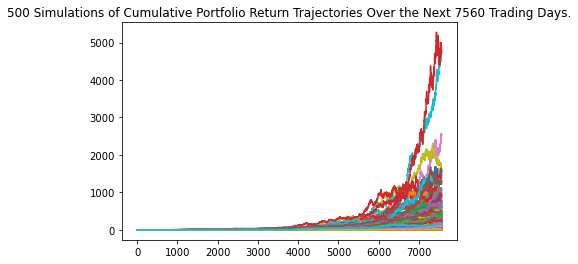

In [17]:
# Plot simulation outcomes
sim_plot = mc_portfolio.plot_simulation()

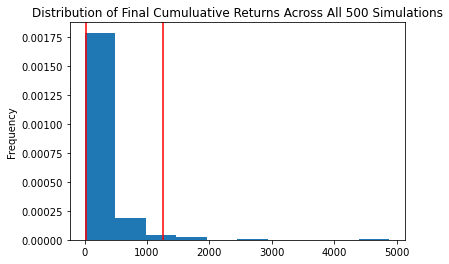

In [18]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

In [19]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary)

count            500.000000
mean             265.790427
std              416.914666
min                5.414894
25%               65.505417
50%              142.287383
75%              309.718433
max             4881.429162
95% CI Lower      15.038965
95% CI Upper    1264.322946
Name: 7560, dtype: float64


In [20]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(portfolio_summary[8]*20000,2)
portfolio_ci_upper = round(portfolio_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $300779.3 and $25286458.93
